# SETUP DATASET

In [152]:
import pandas as pd

In [153]:
data_indikator_diabetes = pd.read_csv("DATASET/data_indikator_diabetes.csv")

In [154]:
data_indikator_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [155]:
data_indikator_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,4.0,4.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,1.0,1.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,5.0,5.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,1.0,0.0,0.0,11.0,5.0,4.0


In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# LOGISTIC REGRESION NORMAL

In [157]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [158]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Membuat pipeline untuk scaling dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

In [160]:
# Melatih model
normal_model = pipeline.fit(X_train, y_train)
normal_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [161]:
# Evaluasi model di data pengujian
y_pred = normal_model.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.8475215165050659
Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.52      0.13      0.21      7082

    accuracy                           0.85     45895
   macro avg       0.69      0.55      0.56     45895
weighted avg       0.81      0.85      0.81     45895



In [162]:
# Cross-validation score
cross_val_scores = cross_val_score(normal_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.85085521 0.84747794 0.84865454 0.84636671 0.84762714]
Mean cross-validation score:  0.8481963073412825


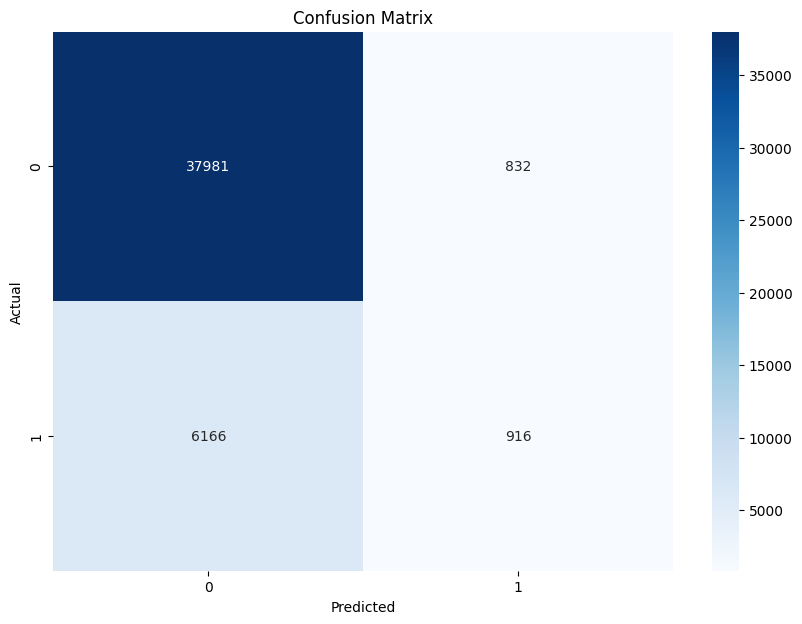

In [163]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [164]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(normal_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

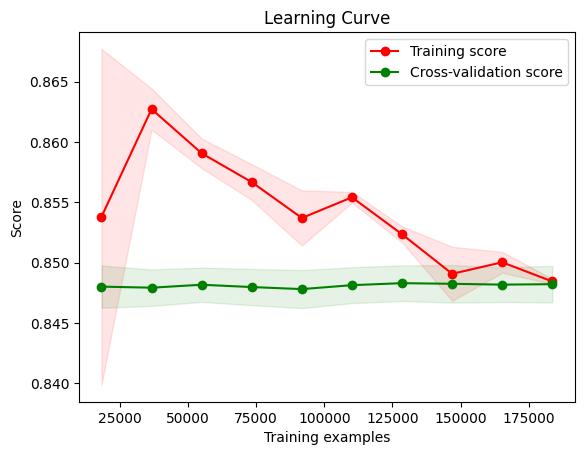

In [165]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [166]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Logistic Regression/Normal_classification_results_LR.csv', index=False)
print("Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.")

Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.


In [167]:
# Simpan model ke file
with open('MODEL-RESULT/Logistic Regression/Normal_trained_model_Logistic Regression.pkl', 'wb') as file:
    pickle.dump(normal_model, file)

# LOGISTIC REGRESION GRID SEARCH

In [168]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [169]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# Membuat pipeline untuk scaling dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

In [171]:
# Menentukan parameter grid untuk GridSearchCV
param = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
}

In [172]:
# Menggunakan GridSearchCV untuk mencari parameter terbaik
lr_grid_search = GridSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [173]:
# Menampilkan parameter terbaik
print("Best parameters found: ", lr_grid_search.best_params_)

Best parameters found:  {'logreg__C': 0.01, 'logreg__penalty': 'l1'}


In [174]:
# Evaluasi model di data pengujian
y_pred = lr_grid_search.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.8474561499073974
Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.52      0.12      0.20      7082

    accuracy                           0.85     45895
   macro avg       0.69      0.55      0.56     45895
weighted avg       0.81      0.85      0.81     45895



In [175]:
# Cross-validation score
cross_val_scores = cross_val_score(lr_grid_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.85089879 0.84769583 0.84885064 0.84643207 0.84769251]
Mean cross-validation score:  0.848313967501945


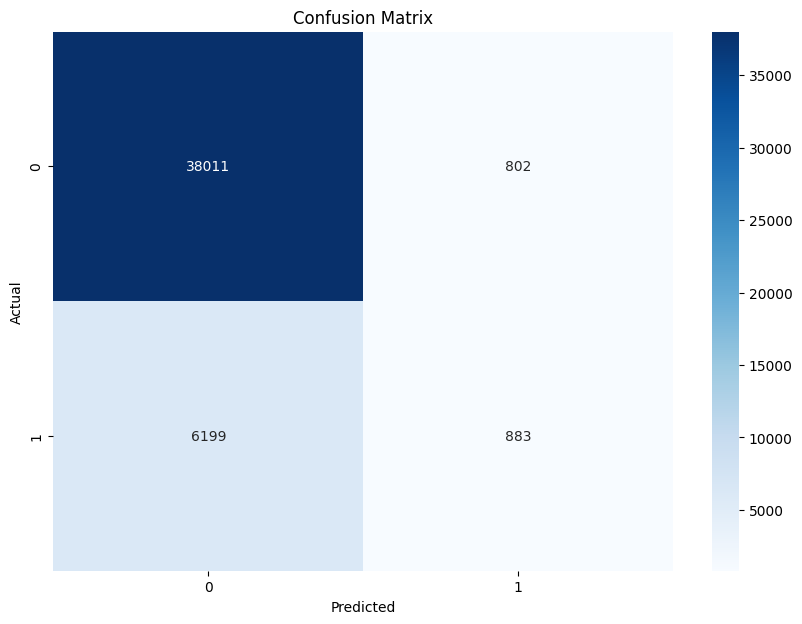

In [176]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [177]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lr_grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

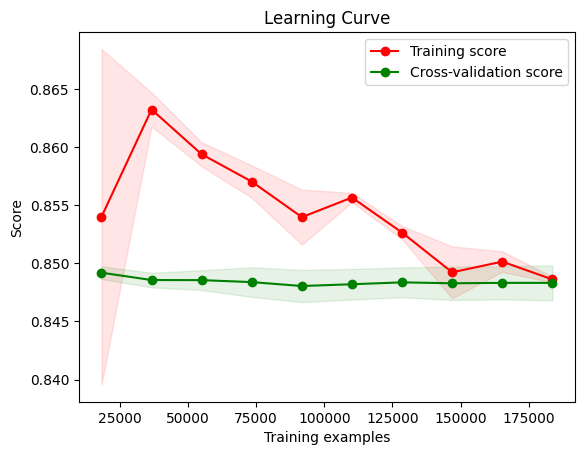

In [178]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [179]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Logistic Regression/GridSearch_classification_results_LR.csv', index=False)
print("Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.")

Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.


In [180]:
# Simpan model ke file
with open('MODEL-RESULT/Logistic Regression/GridSearch_trained_model_LogisticRegression.pkl', 'wb') as file:
    pickle.dump(lr_grid_search, file)

# LOGISTIC REGRESION RANDOM SEARCH

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [183]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
# Membuat pipeline untuk scaling dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

In [185]:
param = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
}

In [186]:
# Menggunakan RandomizedSearchCV untuk mencari parameter terbaik
lr_random_search = RandomizedSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
lr_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logreg',
                                              LogisticRegression(solver='liblinear'))]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.01, 0.1, 1, 10, 100],
                                        'logreg__penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=2)

In [187]:
# Menampilkan parameter terbaik
print("Best parameters found: ", lr_random_search.best_params_)

Best parameters found:  {'logreg__penalty': 'l1', 'logreg__C': 0.01}


In [188]:
# Evaluasi model di data pengujian
y_pred = lr_random_search.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.8474561499073974
Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.52      0.12      0.20      7082

    accuracy                           0.85     45895
   macro avg       0.69      0.55      0.56     45895
weighted avg       0.81      0.85      0.81     45895



In [189]:
# Cross-validation score
cross_val_scores = cross_val_score(lr_random_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.85089879 0.84769583 0.84885064 0.84643207 0.84769251]
Mean cross-validation score:  0.848313967501945


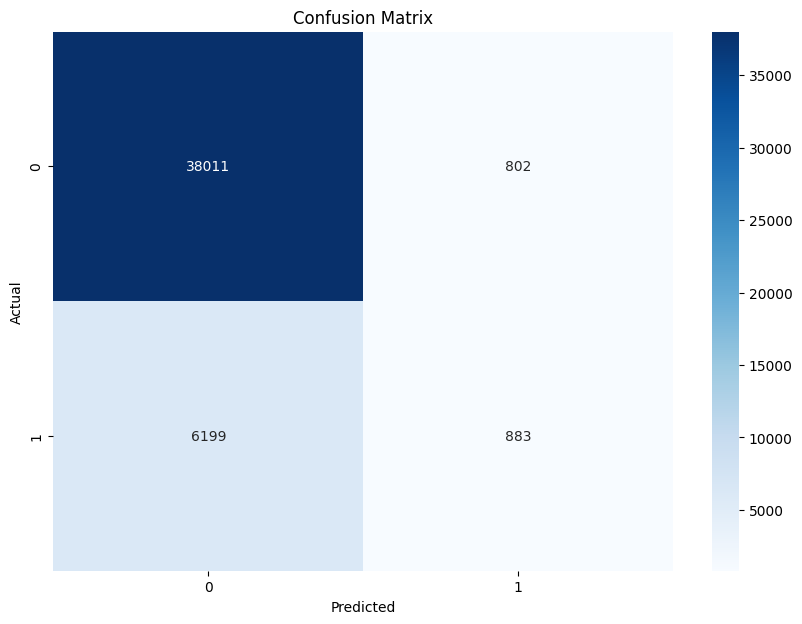

In [190]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [191]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lr_random_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

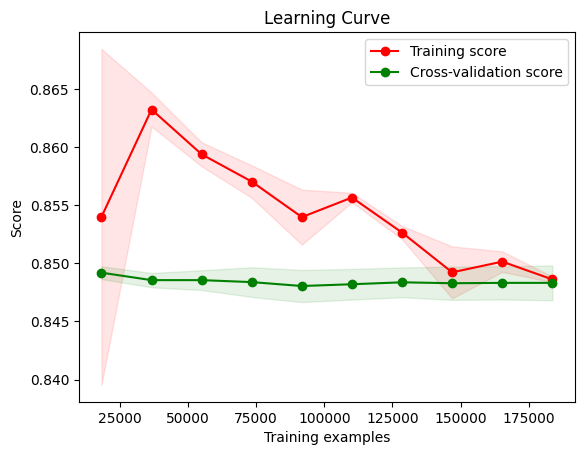

In [192]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [193]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Logistic Regression/RandomSearch_classification_results_LR.csv', index=False)
print("Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.")

Hasil klasifikasi telah disimpan ke file 'classification_results_LR.csv'.


In [194]:
# Simpan model ke file
with open('MODEL-RESULT/Logistic Regression/RandomSearch_trained_model_LogisticRegression.pkl', 'wb') as file:
    pickle.dump(lr_grid_search, file)